# **Publisher Analysis**

---
---

### **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


---
### **Top Publishers and Email-domains:**

In [3]:
# Identify unique publishers
unique_publishers = df['publisher'].unique()
print(f"Number of unique publishers: {len(unique_publishers)}")
print("Sample unique publishers:", unique_publishers[:10])

# Extract email domain patterns if publisher is an email address
email_pattern = r'[\w\.-]+@([\w\.-]+)'
df['publisher_domain'] = df['publisher'].apply(
    lambda x: re.search(email_pattern, str(x)).group(1) if re.search(email_pattern, str(x)) else None
)

# Assess publisher distribution
publisher_counts = df['publisher'].value_counts()
print("\nTop 10 publishers by article count:")
print(publisher_counts.head(10))

# Assess email domain distribution
domain_counts = df['publisher_domain'].value_counts().dropna()
print("\nTop 10 email domains by article count:")
print(domain_counts.head(10))

Number of unique publishers: 59
Sample unique publishers: ['Benzinga Insights' 'Lisa Levin' 'Vick Meyer' 'vishwanath@benzinga.com'
 'Benzinga Newsdesk' 'Benzinga\u2003Newsdesk' 'Luke J Jacobi'
 'Benzinga_Newsdesk' 'Tanzeel Akhtar' 'Priya Nigam']

Top 10 publishers by article count:
publisher
Benzinga Newsdesk          8842
Lisa Levin                 7735
Benzinga Newsdesk          3177
Benzinga Insights          2332
Vick Meyer                 1946
Benzinga_Newsdesk           933
vishwanath@benzinga.com     924
Shanthi Rexaline            637
Charles Gross               327
ETF Professor               205
Name: count, dtype: int64

Top 10 email domains by article count:
publisher_domain
benzinga.com    1072
Name: count, dtype: int64


### **Summary of Publisher and Domain Analysis**

- The dataset contains 28,392 articles, each with details such as headline, URL, publisher, date, stock, and extracted publisher domain.
- There are 59 unique publishers, with the most frequent being "Benzinga Newsdesk" (8,842 articles) and "Lisa Levin" (7,735 articles).
- Publisher domains were extracted from email addresses in the `publisher` field. Only 1,072 entries have a non-null `publisher_domain`.
- All articles with a domain are from `benzinga.com` (1,072 articles).
- This indicates that most publishers are listed by name rather than email, and the dataset is heavily dominated by a single source.

----

### **Visualization for the top 10 publishers and top 10 email domains by article count**

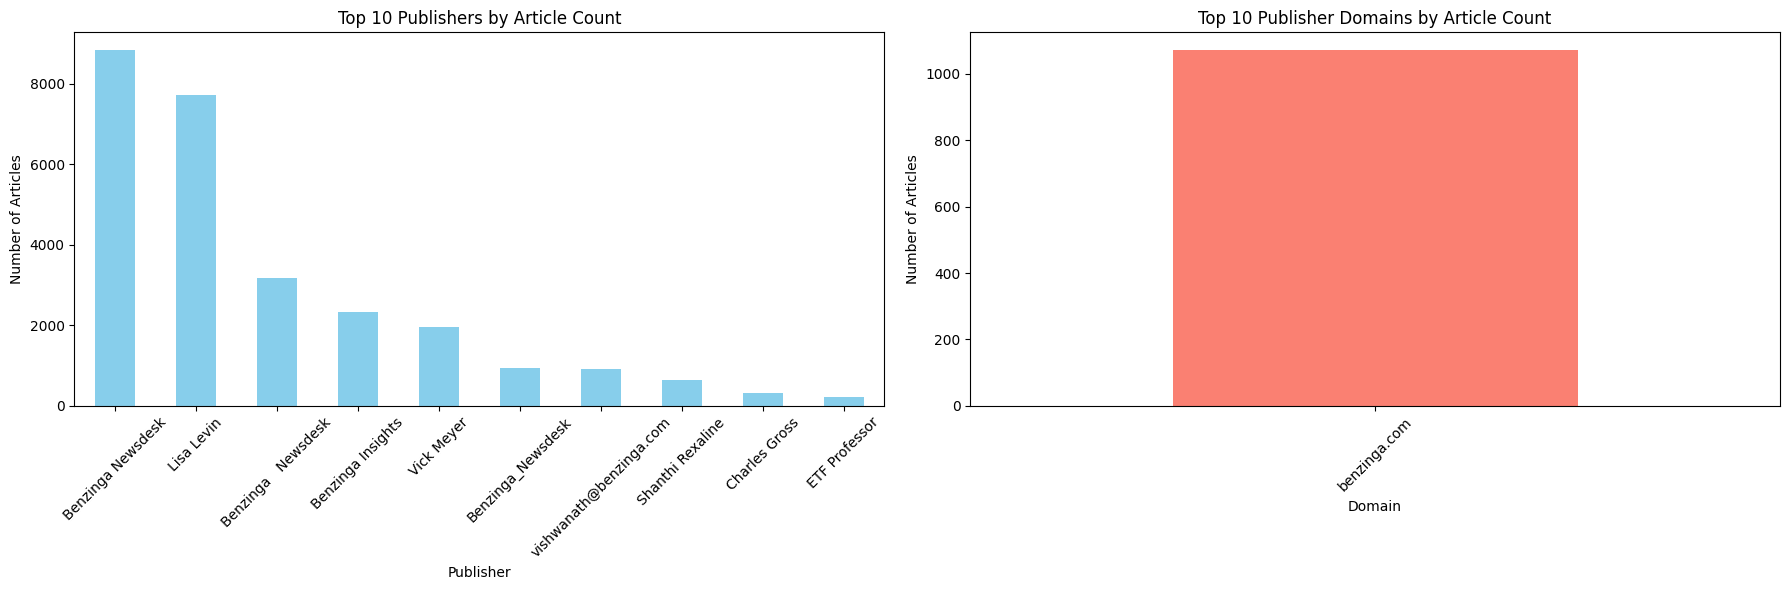

In [4]:
# Visualize the top 10 publishers and top 10 email domains by article count

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 publishers
publisher_counts.head(10).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Publishers by Article Count')
axes[0].set_ylabel('Number of Articles')
axes[0].set_xlabel('Publisher')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 email domains
domain_counts.head(10).plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 10 Publisher Domains by Article Count')
axes[1].set_ylabel('Number of Articles')
axes[1].set_xlabel('Domain')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Summary**

This section analyzes the distribution of publishers and email domains in a dataset of 28,392 articles. The workflow includes:

- Loading and previewing the dataset.
- Identifying 59 unique publishers, with "Benzinga Newsdesk" and "Lisa Levin" as the most prolific.
- Extracting email domains from publisher fields, revealing that only 1,072 entries contain an email domain, all from `benzinga.com`.
- Visualizing the top 10 publishers and top 10 email domains by article count using bar plots.
- The analysis highlights that most publishers are listed by name, and the dataset is dominated by a few key sources, especially Benzinga.